In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
mlde_old = pd.read_csv("results/mlde/all_df_comb_onehot.csv")
mlde_ft = pd.read_csv("results/mlde_ft/vis/all_df.csv")
mlde_ft2 = pd.read_csv("results/mlde_ft2/vis/all_df.csv")

mlde_all = pd.concat([mlde_old, mlde_ft, mlde_ft2], axis=0)

In [45]:
from SSMuLA.landscape_global import LIB_TYPES

In [46]:
active_lib_list = [
    "DHFR",
    "ParD2",
    "ParD3",
    "GB1",
    "TrpB3D",
    "TrpB3E",
    "TrpB3F",
    "TrpB3G",
    "TrpB3I",
    "TrpB4",
]

In [47]:
N_SAMPLE_LIST = [24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
FTLIB_FRAC_LIST = [0.03125, 0.0625, 0.125, 0.25, 0.5, 1]

In [48]:
# ft only 12.5
def get_mlde_avg_sdf(mlde_all, n_top, n_mut_cutoff, zs_list, active_lib_list, ft_frac = 0.125):
    slice_mlde = mlde_all[
        (mlde_all["lib"].isin(active_lib_list))
        & (mlde_all["zs"].isin(zs_list))
        & (mlde_all["n_top"] == n_top)
        & (mlde_all["n_mut_cutoff"] == n_mut_cutoff)
    ]

    if "none" not in zs_list:
        lib_dfs = []
        for lib in active_lib_list:
            lib_df = slice_mlde[slice_mlde["lib"] == lib].copy()
            print(lib, lib_df["ft_lib"].unique())
            lib_df["ft_lib_size"] = lib_df["ft_lib"].map(
                {
                    numb: frac
                    for numb, frac in zip(
                        sorted(lib_df["ft_lib"].unique()), FTLIB_FRAC_LIST[:-1]
                    )
                }
            )
            print(lib_df["ft_lib_size"].unique())
            lib_dfs.append(lib_df[lib_df["ft_lib_size"] == ft_frac])
        slice_mlde = pd.concat(lib_dfs)

    avg_mlde = slice_mlde[["n_sample", "top_maxes", "if_truemaxs", "zs"]].groupby(["n_sample", "zs"]).agg(["mean", "std"]).reset_index()
    avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'}).set_index("n_sample")
    return avg_mlde

In [49]:
def get_mlde_avg_df(mlde_all, n_top, n_mut_cutoff, zs, active_lib_list):
    avg_mlde = mlde_all[
        (mlde_all["lib"].isin(active_lib_list))
        & (mlde_all["zs"].isin(zs))
        & (mlde_all["n_top"] == n_top)
        & (mlde_all["n_mut_cutoff"] == n_mut_cutoff)
    ][["n_sample", "top_maxes", "if_truemaxs", "zs"]].groupby(["n_sample", "zs"]).agg(["mean", "std"]).reset_index()
    avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'}).set_index("n_sample")
    return avg_mlde

In [50]:
from SSMuLA.zs_analysis import ZS_OPTS
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE

%matplotlib inline

In [51]:
ZS_OPTS

['ed_score', 'Triad_score', 'ev_score', 'esm_score', 'esmif_score']

In [66]:
avg_mlde

,zs_,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
n_sample,,,,,
24,Triad_score,0.651533,0.336257,0.1250,0.330884
24,esm_score,0.638892,0.341438,0.1290,0.335368
24,esmif_score,0.655306,0.344037,0.1460,0.353283
24,ev_score,0.648876,0.342485,0.1230,0.328602
48,Triad_score,0.723640,0.310747,0.2120,0.408929
48,esm_score,0.712031,0.316308,0.2110,0.408223
48,esmif_score,0.720636,0.315517,0.2250,0.417791
48,ev_score,0.730412,0.315231,0.2470,0.431483
96,Triad_score,0.797981,0.269911,0.3130,0.463946


In [53]:
# for avg cross number of samples
n_top = 96
n_corr = 384

random_avg = get_mlde_avg_df(mlde_all, n_top, "all", ["none"], active_lib_list)
db = get_mlde_avg_df(mlde_all, n_top, "double", ["none"], active_lib_list)
db["zs_"] = "ed_score"

frac_ft_dict = {}

for frac in FTLIB_FRAC_LIST[:-1]:
    avg_mlde = get_mlde_avg_sdf(mlde_all, n_top, "all", ZS_OPTS, active_lib_list, ft_frac = frac)
    frac_ft_dict[frac] = avg_mlde

DHFR [4000 2000 1000  500  250]
[0.5     0.25    0.125   0.0625  0.03125]
ParD2 [4000 2000 1000  500  250]
[0.5     0.25    0.125   0.0625  0.03125]
ParD3 [4000 2000 1000  500  250]
[0.5     0.25    0.125   0.0625  0.03125]
GB1 [80000 40000 20000 10000  5000]
[0.5     0.25    0.125   0.0625  0.03125]
TrpB3D [4000 2000 1000  500  250]
[0.5     0.25    0.125   0.0625  0.03125]
TrpB3E [4000 2000 1000  500  250]
[0.5     0.25    0.125   0.0625  0.03125]
TrpB3F [4000 2000 1000  500  250]
[0.5     0.25    0.125   0.0625  0.03125]
TrpB3G [4000 2000 1000  500  250]
[0.5     0.25    0.125   0.0625  0.03125]
TrpB3I [4000 2000 1000  500  250]
[0.5     0.25    0.125   0.0625  0.03125]
TrpB4 [80000 40000 20000 10000  5000]
[0.5     0.25    0.125   0.0625  0.03125]
DHFR [4000 2000 1000  500  250]
[0.5     0.25    0.125   0.0625  0.03125]
ParD2 [4000 2000 1000  500  250]
[0.5     0.25    0.125   0.0625  0.03125]
ParD3 [4000 2000 1000  500  250]
[0.5     0.25    0.125   0.0625  0.03125]
GB1 [80000 400

In [54]:
db

,zs_,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
n_sample,,,,,
24,ed_score,0.690363,0.301229,0.138000,0.345073
48,ed_score,0.771400,0.261207,0.214000,0.410332
96,ed_score,0.868777,0.205500,0.416429,0.493054
192,ed_score,0.922755,0.143043,0.575000,0.494590
288,ed_score,0.937091,0.121463,0.630000,0.483046
384,ed_score,0.951112,0.104416,0.675526,0.468239
480,ed_score,0.943692,0.107340,0.649000,0.477522
576,ed_score,0.946117,0.105097,0.663000,0.472921
960,ed_score,0.947957,0.103761,0.692000,0.461898


In [55]:
mlde_all["ft_lib"].unique()

array([  4000,   2000,   1000,  80000,  40000,  20000,     58,     77,
           57,   8000, 149361,   7882,   7971,   7996,   7994,   7763,
         7964,   7339,   7891,   7716,   7784, 159129,   1141,   2168,
         1134,   1127,   1137,   1140,   1126,   1075,   1136,   1138,
         1121,   2243,    600,    300,    150,   1200,    500,  10000,
          250,   5000,     75])

In [78]:
frac_ft_dfs = []
for frac in FTLIB_FRAC_LIST[:-1]:
    frac_ft_dfs.append(frac_ft_dict[frac].loc[[96, 384]].reset_index().assign(ft_lib_size = frac))
frac_ft_dfs.append(random_avg.loc[[96, 384]].reset_index().assign(ft_lib_size = 1))
frac_ft_dfs.append(db.loc[[96, 384]].reset_index().assign(ft_lib_size = 1))

In [79]:
frac_ft_df = pd.concat(frac_ft_dfs).reset_index(drop=True)
frac_ft_df

,n_sample,zs_,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std,ft_lib_size
0,96,Triad_score,0.821753,0.262259,0.416000,0.493140,0.03125
1,96,esm_score,0.917258,0.148609,0.598000,0.490547,0.03125
2,96,esmif_score,0.921592,0.140225,0.695000,0.460638,0.03125
3,96,ev_score,0.917908,0.147573,0.637000,0.481105,0.03125
4,384,Triad_score,0.879271,0.253720,0.648000,0.477833,0.03125
5,384,esm_score,0.962307,0.095139,0.782000,0.413094,0.03125
6,384,esmif_score,0.968879,0.085825,0.865000,0.341895,0.03125
7,384,ev_score,0.979209,0.068043,0.887000,0.316751,0.03125
8,96,Triad_score,0.788482,0.288611,0.409000,0.491895,0.06250
9,96,esm_score,0.899448,0.172542,0.516000,0.499994,0.06250


In [69]:
from SSMuLA.zs_analysis import ZS_OPTS_LEGEND

In [70]:
ZS_OPTS_LEGEND

{'none': 'Random',
 'ed_score': 'Edit distance',
 'Triad_score': 'Triad',
 'ev_score': 'EVmutation',
 'esm_score': 'ESM',
 'esmif_score': 'ESM-IF',
 'struc-comb_score': 'Triad + ESM-IF',
 'Triad-ev_score': 'Triad + EVmutation',
 'Triad-esm_score': 'Triad + ESM',
 'msanoif-comb_score': 'EVmutation + ESM',
 'msa-comb_score': 'EVmutation + ESM + ESM-IF',
 'structnmsa-comb_score': 'Triad + EVmutation + ESM + ESM-IF'}

In [71]:
from SSMuLA.vis_summary import ZS_COLOR_MAP_APPENDED, ZS_OPTS_APPENDED

In [72]:
ZS_COLOR_MAP_APPENDED

{'none': '#666666',
 'Triad_score': '#4bacc6',
 'ev_score': '#9bbb59',
 'esm_score': '#8064a2',
 'esmif_score': '#ff8888',
 'struc-comb_score': '#849895',
 'msanoif-comb_score': '#9DAE88',
 'msa-comb_score': '#F1D384',
 'structnmsa-comb_score': '#C7B784',
 'double': '#f79646ff',
 'single': '#f9be00'}

In [63]:
PRESENTATION_PALETTE_SATURATE

{'blue': '#4bacc6',
 'orange': '#f79646ff',
 'light_orange': '#ffbb78',
 'red': '#ff8888',
 'maroon': '#7A303F',
 'green': '#9bbb59',
 'yellow': '#f9be00',
 'purple': '#8064a2',
 'brown': '#6e4a2eff',
 'gray': '#666666',
 'light_gray': '#D3D3D3',
 'light_blue': '#849895',
 'light_green': '#9DAE88',
 'light_yellow': '#F1D384',
 'light_brown': '#C7B784'}

In [64]:
five_zs = {'none': PRESENTATION_PALETTE_SATURATE["gray"],
 'ed_score': PRESENTATION_PALETTE_SATURATE["orange"],
 'Triad_score': PRESENTATION_PALETTE_SATURATE["blue"],
 'ev_score': PRESENTATION_PALETTE_SATURATE["green"],
 'esm_score': PRESENTATION_PALETTE_SATURATE["purple"],
 'esmif_score': PRESENTATION_PALETTE_SATURATE["yellow"]}

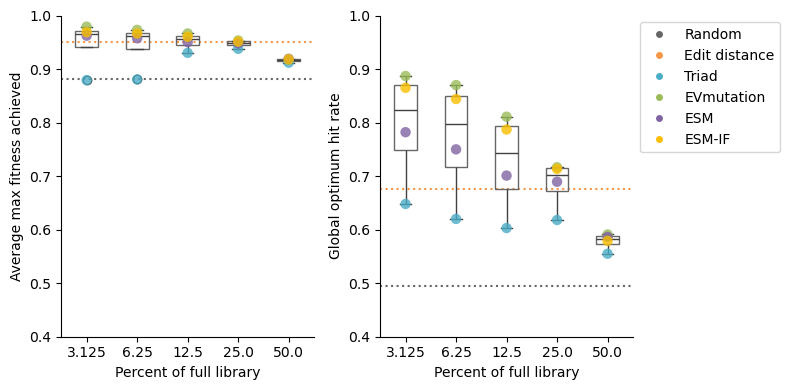

In [80]:
n_sample = 384

# mlde_color_list = ["yellow", "orange", "blue", "green", "purple", "red"]
ms = ["top_maxes_mean", "if_truemaxs_mean"]
titles = ["Average max fitness achieved", "Global optimum hit rate"]

slice_df = frac_ft_df[frac_ft_df["n_sample"] == n_sample].copy()

# Convert 'Category' column to categorical with defined order
slice_df['zs_'] = pd.Categorical(slice_df['zs_'], categories=list(five_zs.keys()), ordered=True)

# Sort DataFrame by 'Category'
slice_df = slice_df.sort_values(by='zs_')

fig, axes = plt.subplots(1, 2, figsize=(8, 4),)

for i, ax in enumerate(axes):

    ax.axhline(slice_df[slice_df["zs_"]=="none"][ms[i]].values[0], ls="dotted", color=five_zs["none"])
    ax.axhline(slice_df[slice_df["zs_"]=="ed_score"][ms[i]].values[0], ls="dotted", color=five_zs["ed_score"])

    sliced_df = slice_df[~slice_df["zs_"].isin(["none", "ed_score"])].copy()
    # sliced_df["ft_lib_size"] = sliced_df["ft_lib_size"] * 100

    ax = sns.stripplot(
        data=sliced_df,
        # x="ft_lib_size",
        x="ft_lib",
        y=ms[i],
        hue="zs_",
        size=7.5,
        alpha=0.8,
        jitter=False,
        # style="ft_lib_size",
        marker='o',
        ax=ax,
        palette=list(five_zs.values()),
    )
    # ax.set_xscale("symlog")

    sns.boxplot(
        # x="ft_lib_size", 
        x= "ft_lib",
        y=ms[i], 
        data=sliced_df,
        # showfliers=False,
        width=0.45, 
        boxprops={'facecolor': 'None', 'edgecolor': PRESENTATION_PALETTE_SATURATE["gray"]},
        # color=PRESENTATION_PALETTE_SATURATE["light_gray"],
        ax=ax,# palette="pastel", showmeans=True
        # order = np.linspace(0, 1, 9),
        # patch_artist=True
    )

    
    ax.set_xlabel("Percent of full library")
    ax.set_ylabel(titles[i])
    # ax.set_title(titles[i])
    # ax.set_xlim(0, 1)
    ax.set_ylim(0.4, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.set_xticks(sliced_df["ft_lib_size"].unique())
   
    
axes[0].legend_.remove()  # Remove legend from the first subplot
legend_list = []
for zs, c in five_zs.items():
    legend_list.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, # markersize=10,
    label=ZS_OPTS_APPENDED[zs]))
axes[1].legend(handles=legend_list, loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()

In [27]:
0.0625 / 2

0.03125